In [26]:
import pandas as pd
from get_chain import *
from styles import *
import matplotlib.pyplot as plt
import numpy as np

In [27]:
chain = ret_chain("AAPL", "2025-06-18")

In [28]:
option_data = chain.values()  # Now we get the real options data

flattened_data = []
for opt in option_data:
    row = {
        "symbol": opt.symbol,  # Extract symbol
        "delta": getattr(opt.greeks, "delta", None),
        "gamma": getattr(opt.greeks, "gamma", None),
        "rho": getattr(opt.greeks, "rho", None),
        "theta": getattr(opt.greeks, "theta", None),
        "vega": getattr(opt.greeks, "vega", None),
        "implied_volatility": getattr(opt, "implied_volatility", None),
        "ask_price": getattr(opt.latest_quote, "ask_price", None),
        "ask_size": getattr(opt.latest_quote, "ask_size", None),
        "bid_price": getattr(opt.latest_quote, "bid_price", None),
        "bid_size": getattr(opt.latest_quote, "bid_size", None),
        "conditions": getattr(opt.latest_quote, "conditions", None),
        "tape": getattr(opt.latest_quote, "tape", None),
        "timestamp": getattr(opt.latest_quote, "timestamp", None)
    }
    flattened_data.append(row)

# Convert to DataFrame
df = pd.DataFrame(flattened_data)

In [29]:
df["underlying_symbol"] = df["symbol"].str.extract(r"^([A-Z]+)")
df["expiration"] = df["symbol"].str.extract(r"(\d{6})")
df["expiration"] = pd.to_datetime(df["expiration"], format="%y%m%d")
df["option_type"] = df["symbol"].str.extract(r"(\d{6})([PC])")[1]
df["strike_price"] = df["symbol"].str.extract(r"([PC])(\d{8})")[1].astype(float) / 1000  # Convert to proper decimal

# Reorder columns for clarity
df = df[["symbol", "underlying_symbol", "expiration", "option_type", "strike_price", "delta", "gamma", "rho", "theta", "vega", "implied_volatility", "ask_price", "ask_size", "bid_price", "bid_size", "conditions", "tape", "timestamp"]].sort_values(by="strike_price")

In [30]:
df = df.sort_values(["option_type", "strike_price"]).reset_index(drop=True)

In [31]:
df.head()

,symbol,underlying_symbol,expiration,option_type,strike_price,delta,gamma,rho,theta,vega,implied_volatility,ask_price,ask_size,bid_price,bid_size,conditions,tape,timestamp
0,AAPL250620C00005000,AAPL,2025-06-20,C,5.0,NaN,NaN,NaN,NaN,NaN,NaN,231.25,100.0,230.25,100.0,A,None,2025-03-05 20:59:59.671777+00:00
1,AAPL250620C00010000,AAPL,2025-06-20,C,10.0,NaN,NaN,NaN,NaN,NaN,NaN,226.55,100.0,225.00,100.0,,None,2025-03-05 20:59:59.975587+00:00
2,AAPL250620C00015000,AAPL,2025-06-20,C,15.0,NaN,NaN,NaN,NaN,NaN,NaN,221.65,100.0,220.10,100.0,A,None,2025-03-05 20:59:54.905565+00:00
3,AAPL250620C00020000,AAPL,2025-06-20,C,20.0,NaN,NaN,NaN,NaN,NaN,NaN,216.75,100.0,215.20,100.0,A,None,2025-03-05 20:59:54.905830+00:00
4,AAPL250620C00025000,AAPL,2025-06-20,C,25.0,NaN,NaN,NaN,NaN,NaN,NaN,211.80,100.0,210.20,100.0,A,None,2025-03-05 20:59:54.905324+00:00


Total strategy price: $0.35


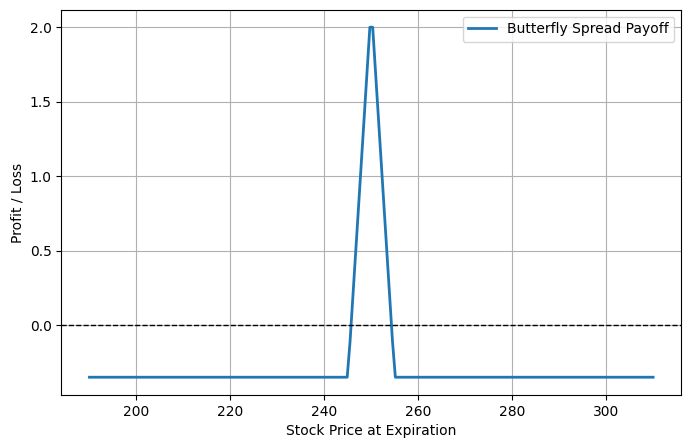

In [32]:
chosen_price, chosen_payoff, stock_prices = butterfly_spread(df, 250, 'C')
print("Total strategy price: $" + str(round(chosen_price,2)))

# Plot the payoff diagram
plt.figure(figsize=(8, 5))
plt.plot(stock_prices, chosen_payoff, label="Butterfly Spread Payoff", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Breakeven line

plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid()
plt.show()

Total strategy price: $28.25


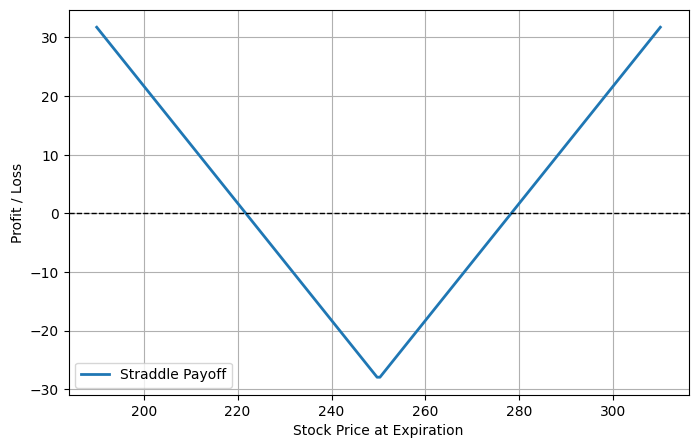

In [33]:
chosen_price, chosen_payoff, stock_prices = straddle(df, 250)
print("Total strategy price: $" + str(round(chosen_price,2)))

# Plot the payoff diagram
plt.figure(figsize=(8, 5))
plt.plot(stock_prices, chosen_payoff, label="Straddle Payoff", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Breakeven line

plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid()
plt.show()

Total strategy price: $8.05


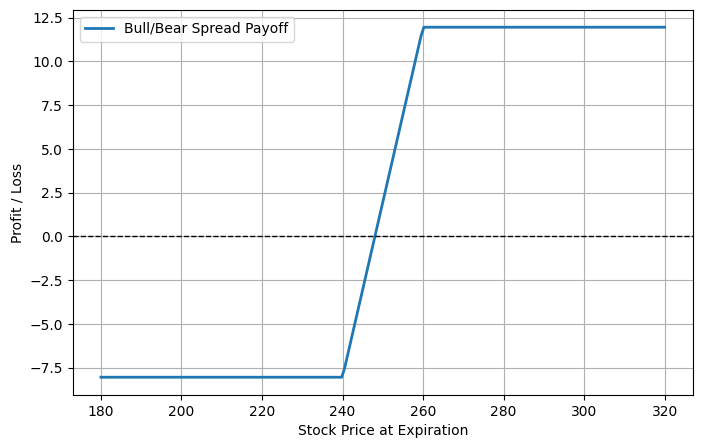

In [34]:
chosen_price, chosen_payoff, stock_prices = bull_or_bear(df, 'bull', 'C', 240, 260)
print("Total strategy price: $" + str(round(chosen_price,2)))

# Plot the payoff diagram
plt.figure(figsize=(8, 5))
plt.plot(stock_prices, chosen_payoff, label="Bull/Bear Spread Payoff", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Breakeven line

plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid()
plt.show()